# **REGRESION** **LINEAL**

**# PUNTO REGRESIÓN LINEAL**

Todas las variables de un modelo de regresion lineal deben ser númericas

In [1]:
if (!require('caret')) install.packages('caret')

Loading required package: caret

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘caret’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [2]:
install.packages("MASS")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library("MASS")
library(tidyverse)
library(caret)
library(ggplot2)
library(splines)
library(mgcv)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::select() masks MASS::select()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:dplyr’:

    collapse


This is mgcv 1.9-3. For overview type 'help("mgcv-package")'.



In [ ]:
install.packages("corrplot")
install.packages("lmtest")
install.packages("MASS")
install.packages("leaps")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(corrplot)
library(lmtest)
library(MASS)
library(leaps)
library(caret)
library(ggplot2)

corrplot 0.95 loaded

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




- En este caso, quilates, x, y, están como chr pero debería ser numérica



- Talla es una variabe=le categorica (1,2,3) por lo que se debe convertir a factor y posteriormente dumificar

- Color y claridad tambien son categorias por lo que se debe convertir a factor y dumificar


In [ ]:
regtecnica <- read.csv("/content/demanda_diaria.csv")

str(regtecnica)

'data.frame':	730 obs. of  16 variables:
 $ indice    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ fecha     : chr  "01-01-2018" "02-01-2018" "03-01-2018" "04-01-2018" ...
 $ temporada : int  1 1 1 1 1 1 1 1 1 1 ...
 $ ano       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ mes       : int  1 1 1 1 1 1 1 1 1 1 ...
 $ festivo   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ dia       : int  6 0 1 2 3 4 5 6 0 1 ...
 $ laboral   : int  0 0 1 1 1 1 1 0 0 1 ...
 $ clima     : int  2 2 1 1 1 1 2 2 1 1 ...
 $ temp      : num  14.11 14.9 8.05 8.2 9.31 ...
 $ atemp     : num  18.18 17.69 9.47 10.61 11.46 ...
 $ humedad   : num  80.6 69.6 43.7 59 43.7 ...
 $ viento    : num  10.7 16.7 16.6 10.7 12.5 ...
 $ casual    : int  331 131 120 108 82 88 148 68 54 41 ...
 $ registrado: int  654 670 1229 1454 1518 1518 1362 891 768 1280 ...
 $ conteo    : int  985 801 1349 1562 1600 1606 1510 959 822 1321 ...


# Conversión de variables

In [ ]:
regtecnica$temporada <-as.factor(regtecnica$temporada)
regtecnica$ano <-as.factor(regtecnica$ano)
regtecnica$festivo <-as.factor(regtecnica$festivo)
regtecnica$mes <-as.factor(regtecnica$mes)
regtecnica$dia<-as.factor(regtecnica$dia)
regtecnica$laboral<-as.factor(regtecnica$laboral)
regtecnica$clima<-as.factor(regtecnica$clima)

In [ ]:
str(regtecnica)

'data.frame':	730 obs. of  16 variables:
 $ indice    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ fecha     : chr  "01-01-2018" "02-01-2018" "03-01-2018" "04-01-2018" ...
 $ temporada : Factor w/ 4 levels "1","2","3","4": 1 1 1 1 1 1 1 1 1 1 ...
 $ ano       : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ mes       : Factor w/ 12 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ festivo   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ dia       : Factor w/ 7 levels "0","1","2","3",..: 7 1 2 3 4 5 6 7 1 2 ...
 $ laboral   : Factor w/ 2 levels "0","1": 1 1 2 2 2 2 2 1 1 2 ...
 $ clima     : Factor w/ 3 levels "1","2","3": 2 2 1 1 1 1 2 2 1 1 ...
 $ temp      : num  14.11 14.9 8.05 8.2 9.31 ...
 $ atemp     : num  18.18 17.69 9.47 10.61 11.46 ...
 $ humedad   : num  80.6 69.6 43.7 59 43.7 ...
 $ viento    : num  10.7 16.7 16.6 10.7 12.5 ...
 $ casual    : int  331 131 120 108 82 88 148 68 54 41 ...
 $ registrado: int  654 670 1229 1454 1518 1518 1362 891 768 1280 ...
 $ cont

In [ ]:
regtecnica$fecha <- NULL
regtecnica$casual <- NULL
regtecnica$registrado <- NULL
regtecnica$indice <- NULL

In [ ]:
str(regtecnica)

'data.frame':	730 obs. of  12 variables:
 $ temporada: Factor w/ 4 levels "1","2","3","4": 1 1 1 1 1 1 1 1 1 1 ...
 $ ano      : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ mes      : Factor w/ 12 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ festivo  : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ dia      : Factor w/ 7 levels "0","1","2","3",..: 7 1 2 3 4 5 6 7 1 2 ...
 $ laboral  : Factor w/ 2 levels "0","1": 1 1 2 2 2 2 2 1 1 2 ...
 $ clima    : Factor w/ 3 levels "1","2","3": 2 2 1 1 1 1 2 2 1 1 ...
 $ temp     : num  14.11 14.9 8.05 8.2 9.31 ...
 $ atemp    : num  18.18 17.69 9.47 10.61 11.46 ...
 $ humedad  : num  80.6 69.6 43.7 59 43.7 ...
 $ viento   : num  10.7 16.7 16.6 10.7 12.5 ...
 $ conteo   : int  985 801 1349 1562 1600 1606 1510 959 822 1321 ...


In [ ]:
carterawin<-dummyVars("~.",data=regtecnica)
carterafin<-as.data.frame(predict(carterawin,newdata=regtecnica))

In [ ]:
str(carterafin)

'data.frame':	730 obs. of  37 variables:
 $ temporada.1: num  1 1 1 1 1 1 1 1 1 1 ...
 $ temporada.2: num  0 0 0 0 0 0 0 0 0 0 ...
 $ temporada.3: num  0 0 0 0 0 0 0 0 0 0 ...
 $ temporada.4: num  0 0 0 0 0 0 0 0 0 0 ...
 $ ano.0      : num  1 1 1 1 1 1 1 1 1 1 ...
 $ ano.1      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ mes.1      : num  1 1 1 1 1 1 1 1 1 1 ...
 $ mes.2      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ mes.3      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ mes.4      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ mes.5      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ mes.6      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ mes.7      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ mes.8      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ mes.9      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ mes.10     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ mes.11     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ mes.12     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ festivo.0  : num  1 1 1 1 1 1 1 1 1 1 ...
 $ festivo.1  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ dia.0      : num  0 1 0 0 0 0 0 0 1 0 ...
 $ dia.1      

In [ ]:
carterafin2<-within(carterafin,rm(temporada.4,mes.12,festivo.1,dia.6,laboral.1,clima.3))
str(carterafin2)

'data.frame':	730 obs. of  31 variables:
 $ temporada.1: num  1 1 1 1 1 1 1 1 1 1 ...
 $ temporada.2: num  0 0 0 0 0 0 0 0 0 0 ...
 $ temporada.3: num  0 0 0 0 0 0 0 0 0 0 ...
 $ ano.0      : num  1 1 1 1 1 1 1 1 1 1 ...
 $ ano.1      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ mes.1      : num  1 1 1 1 1 1 1 1 1 1 ...
 $ mes.2      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ mes.3      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ mes.4      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ mes.5      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ mes.6      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ mes.7      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ mes.8      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ mes.9      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ mes.10     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ mes.11     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ festivo.0  : num  1 1 1 1 1 1 1 1 1 1 ...
 $ dia.0      : num  0 1 0 0 0 0 0 0 1 0 ...
 $ dia.1      : num  0 0 1 0 0 0 0 0 0 1 ...
 $ dia.2      : num  0 0 0 1 0 0 0 0 0 0 ...
 $ dia.3      : num  0 0 0 0 1 0 0 0 0 0 ...
 $ dia.4      

# Modelo

 Plantee un modelo preliminar para predecir la demanda (llámelo modelo0).

In [ ]:
set.seed(920203) #se deja alguna semilla para que el muestreo sea replicable
#aquí se define el tamaño de la muestra, en este caso entrenamiento tendrá el 80% de los casos
sample <- sample.int(nrow(carterafin2), floor(.8*nrow(carterafin2)))
regtecnica.train <- carterafin2[sample, ]
regtecnica.test <- carterafin2[-sample, ]

In [ ]:
#CREANDO MODELO 0

# un modelo con todas las variables (preespecificado)
modelo0<- lm(conteo ~.,data=regtecnica.train)

**Seleccione las variables que sean significativas a un nivel de significancia = 0.01, y plantee un nuevo modelo (llámelo modelo1). Calcule las métricas de desempeño (RMSE, R2) tanto en entrenamiento como en prueba.**

In [ ]:
modelostep<- step(modelo0,direction="both")
summary(modelostep)

Start:  AIC=7764.71
conteo ~ temporada.1 + temporada.2 + temporada.3 + ano.0 + ano.1 + 
    mes.1 + mes.2 + mes.3 + mes.4 + mes.5 + mes.6 + mes.7 + mes.8 + 
    mes.9 + mes.10 + mes.11 + festivo.0 + dia.0 + dia.1 + dia.2 + 
    dia.3 + dia.4 + dia.5 + laboral.0 + clima.1 + clima.2 + temp + 
    atemp + humedad + viento


Step:  AIC=7764.71
conteo ~ temporada.1 + temporada.2 + temporada.3 + ano.0 + ano.1 + 
    mes.1 + mes.2 + mes.3 + mes.4 + mes.5 + mes.6 + mes.7 + mes.8 + 
    mes.9 + mes.10 + mes.11 + festivo.0 + dia.0 + dia.1 + dia.2 + 
    dia.3 + dia.4 + dia.5 + clima.1 + clima.2 + temp + atemp + 
    humedad + viento


Step:  AIC=7764.71
conteo ~ temporada.1 + temporada.2 + temporada.3 + ano.0 + mes.1 + 
    mes.2 + mes.3 + mes.4 + mes.5 + mes.6 + mes.7 + mes.8 + mes.9 + 
    mes.10 + mes.11 + festivo.0 + dia.0 + dia.1 + dia.2 + dia.3 + 
    dia.4 + dia.5 + clima.1 + clima.2 + temp + atemp + humedad + 
    viento

              Df Sum of Sq       RSS    AIC
- dia.5        1      


Call:
lm(formula = conteo ~ temporada.1 + temporada.2 + temporada.3 + 
    ano.0 + mes.3 + mes.4 + mes.5 + mes.6 + mes.8 + mes.9 + mes.10 + 
    festivo.0 + dia.0 + dia.1 + clima.1 + clima.2 + atemp + humedad + 
    viento, data = regtecnica.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-3439.0  -370.8    63.8   452.4  2857.9 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2303.736    431.150   5.343 1.33e-07 ***
temporada.1 -1353.340    113.800 -11.892  < 2e-16 ***
temporada.2  -540.353    187.507  -2.882 0.004105 ** 
temporada.3  -600.874    149.446  -4.021 6.59e-05 ***
ano.0       -2016.050     63.139 -31.930  < 2e-16 ***
mes.3         505.116    134.549   3.754 0.000192 ***
mes.4         439.793    204.340   2.152 0.031801 *  
mes.5         685.238    208.308   3.290 0.001066 ** 
mes.6         430.816    176.473   2.441 0.014942 *  
mes.8         503.763    143.669   3.506 0.000490 ***
mes.9        1075.640    132.173   8.138 2.58e-

In [ ]:
#un modelo con variables elegidas (preespecificado) menores a pvalor 0.01
modelo1<- lm(conteo ~temporada.1+ temporada.2 + temporada.3 +ano.0 +mes.3+mes.5+mes.8+mes.9+mes.10+festivo.0+dia.0+clima.1+clima.2+atemp+humedad+viento,data=regtecnica.train)

RMSE Y R2 en PRUEBA

- RMSE = 853.7888
- R2 = 0.8023395



In [ ]:
predictions<-modelo1 %>% predict(regtecnica.test)
data.frame(
  RMSE=RMSE(predictions,regtecnica.test$conteo),
  R2=R2(predictions,regtecnica.test$conteo)
)

RMSE,R2
<dbl>,<dbl>
853.7888,0.8023395


RMSE Y R2 EN ENTRENAMIENTO

- RMSE= 754.9
- R2 = 0.849

In [ ]:
summary(modelo1)


Call:
lm(formula = conteo ~ temporada.1 + temporada.2 + temporada.3 + 
    ano.0 + mes.3 + mes.5 + mes.8 + mes.9 + mes.10 + festivo.0 + 
    dia.0 + clima.1 + clima.2 + atemp + humedad + viento, data = regtecnica.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-3603.1  -377.5    61.2   448.2  2964.5 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2201.949    433.205   5.083 5.06e-07 ***
temporada.1 -1315.792    113.243 -11.619  < 2e-16 ***
temporada.2  -208.316    123.473  -1.687 0.092127 .  
temporada.3  -596.563    149.691  -3.985 7.62e-05 ***
ano.0       -2008.671     63.518 -31.624  < 2e-16 ***
mes.3         346.384    119.884   2.889 0.004008 ** 
mes.5         290.159    138.441   2.096 0.036533 *  
mes.8         399.342    139.661   2.859 0.004401 ** 
mes.9        1010.839    130.864   7.724 5.13e-14 ***
mes.10        680.801    138.388   4.919 1.14e-06 ***
festivo.0     808.815    213.506   3.788 0.000168 ***
dia.0        -342.439 

In [ ]:
# Assuming your original dataframe is called 'carterafin2'
new_df <- subset(carterafin2, select = c(temporada.1, temporada.2, temporada.3, ano.0, mes.3, mes.5, mes.8, mes.9, mes.10, festivo.0, dia.0, clima.1, clima.2, atemp, humedad, viento,conteo))

# To view the structure of the new dataframe
str(new_df)

'data.frame':	730 obs. of  17 variables:
 $ temporada.1: num  1 1 1 1 1 1 1 1 1 1 ...
 $ temporada.2: num  0 0 0 0 0 0 0 0 0 0 ...
 $ temporada.3: num  0 0 0 0 0 0 0 0 0 0 ...
 $ ano.0      : num  1 1 1 1 1 1 1 1 1 1 ...
 $ mes.3      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ mes.5      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ mes.8      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ mes.9      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ mes.10     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ festivo.0  : num  1 1 1 1 1 1 1 1 1 1 ...
 $ dia.0      : num  0 1 0 0 0 0 0 0 1 0 ...
 $ clima.1    : num  0 0 1 1 1 1 0 0 1 1 ...
 $ clima.2    : num  1 1 0 0 0 0 1 1 0 0 ...
 $ atemp      : num  18.18 17.69 9.47 10.61 11.46 ...
 $ humedad    : num  80.6 69.6 43.7 59 43.7 ...
 $ viento     : num  10.7 16.7 16.6 10.7 12.5 ...
 $ conteo     : num  985 801 1349 1562 1600 ...


# REGULARIZACIÓN

**(5) Plantee un modelo de regularización RIDGE, con las mismas variables del modelo1, usando validación cruzada. Pruebe con el lambda mínimo y el lambda a una desviación estándar. Compare el desempeño con ambos lambdas y escoja el lambda que conlleve a un menor overfitting, justifique su respuesta (llame el modelo final modelo2).**

In [ ]:
install.packages("glmnet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘RcppEigen’




In [ ]:
library(glmnet)

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-8



In [ ]:
dim(new_df)

[1] 730  17

**Modelo Ridge**

In [ ]:
which(colnames(new_df) == "conteo")

[1] 17

In [ ]:
str(new_df)

'data.frame':	730 obs. of  17 variables:
 $ temporada.1: num  1 1 1 1 1 1 1 1 1 1 ...
 $ temporada.2: num  0 0 0 0 0 0 0 0 0 0 ...
 $ temporada.3: num  0 0 0 0 0 0 0 0 0 0 ...
 $ ano.0      : num  1 1 1 1 1 1 1 1 1 1 ...
 $ mes.3      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ mes.5      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ mes.8      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ mes.9      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ mes.10     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ festivo.0  : num  1 1 1 1 1 1 1 1 1 1 ...
 $ dia.0      : num  0 1 0 0 0 0 0 0 1 0 ...
 $ clima.1    : num  0 0 1 1 1 1 0 0 1 1 ...
 $ clima.2    : num  1 1 0 0 0 0 1 1 0 0 ...
 $ atemp      : num  18.18 17.69 9.47 10.61 11.46 ...
 $ humedad    : num  80.6 69.6 43.7 59 43.7 ...
 $ viento     : num  10.7 16.7 16.6 10.7 12.5 ...
 $ conteo     : num  985 801 1349 1562 1600 ...


In [ ]:
set.seed(920203) #se deja alguna semilla para que el muestreo sea replicable
#aquí se define el tamaño de la muestra, en este caso entrenamiento tendrá el 80% de los casos
sample <- sample.int(nrow(new_df), floor(.8*nrow(new_df)))
regtecnica.train <- new_df[sample, ]
regtecnica.test <- new_df[-sample, ]

In [ ]:
# Separar la variable objetivo (precio) de las variables predictoras
predic.train <- as.matrix(regtecnica.train[ , -ncol(regtecnica.train)])
precio.train <- regtecnica.train$conteo
predic.test<- as.matrix(regtecnica.test[ , -ncol(regtecnica.test)])
precio.test<- regtecnica.test$conteo

In [ ]:
fitridge<-glmnet(predic.train,precio.train,alpha = 0)

In [ ]:
foundridge<-cv.glmnet(predic.train, precio.train,alpha=0,nfolds=5)

In [ ]:
#veo los lambda minimos
foundridge$lambda.1se

[1] 348.3136

In [ ]:
foundridge$lambda.min

[1] 125.1774

Desempeño en Prueba

In [ ]:
#ridge lambda min
predicciones2<-predict.glmnet(fitridge, predic.test, s=foundridge$lambda.min)
data.frame(
  RMSE=RMSE(predicciones2,regtecnica.test$conteo),
  R2=R2(predicciones2,regtecnica.test$conteo)
)

#ridge lambda 1.se
predicciones3<-predict.glmnet(fitridge, predic.test, s=foundridge$lambda.1se)
data.frame(
  RMSE=RMSE(predicciones3,regtecnica.test$conteo),
  R2=R2(predicciones3,regtecnica.test$conteo)
)


RMSE,s1
<dbl>,<dbl>
850.0999,0.8056793


RMSE,s1
<dbl>,<dbl>
886.0285,0.7981423


Desempeño en entrenamiento

In [ ]:
#ridge lambda min
predicciones2<-predict.glmnet(fitridge, predic.train, s=foundridge$lambda.min)
data.frame(
  RMSE=RMSE(predicciones2,regtecnica.train$conteo),
  R2=R2(predicciones2,regtecnica.train$conteo)
)

#ridge lambda 1se

predicciones3<-predict.glmnet(fitridge, predic.train, s=foundridge$lambda.1se)
data.frame(
  RMSE=RMSE(predicciones3,regtecnica.train$conteo),
  R2=R2(predicciones3,regtecnica.train$conteo)
)


RMSE,s1
<dbl>,<dbl>
768.5169,0.8455157


RMSE,s1
<dbl>,<dbl>
814.6477,0.8345138


Ambos modelos conllevan a un sobre ajuste, sin embargo, se recomedaria seleccionar el modelo con lambda 1.se debido a que en entrenamiento tiene un R2 de 0.83 y en prueba de 0.798, mientras que el modelo con lambda minimo en entrenamiento tiene un desempeño de 0.84 y en prueba de 0.80, lo que conlleva a un mayor sobre ajuste

In [ ]:
Este seria el modelo2 con el mejor lambda

In [ ]:
# Miremos los resultados usando ese valor de lambda con una desviación estándar más
coef(foundridge,s=foundridge$lambda.1se)

17 x 1 sparse Matrix of class "dgCMatrix"
                     s1
(Intercept)  3955.38607
temporada.1 -1133.18515
temporada.2    98.88469
temporada.3   -43.50642
ano.0       -1782.42683
mes.3         200.18916
mes.5         325.95273
mes.8         296.40232
mes.9         797.91368
mes.10        747.62432
festivo.0     654.76663
dia.0        -273.59277
clima.1       758.67155
clima.2       298.13630
atemp          81.69278
humedad       -15.71053
viento        -47.04078

(5) Plantee un modelo de regularización LASSO , con las mismas variables del modelo1, usando validación cruzada. Compare el desempeño con ambos lambdas y escoja el que conlleve a un menor overfitting, justifique su respuesta (llame el modelo final modelo3)

In [ ]:
fitlasso<-glmnet(predic.train,precio.train,alpha = 1)

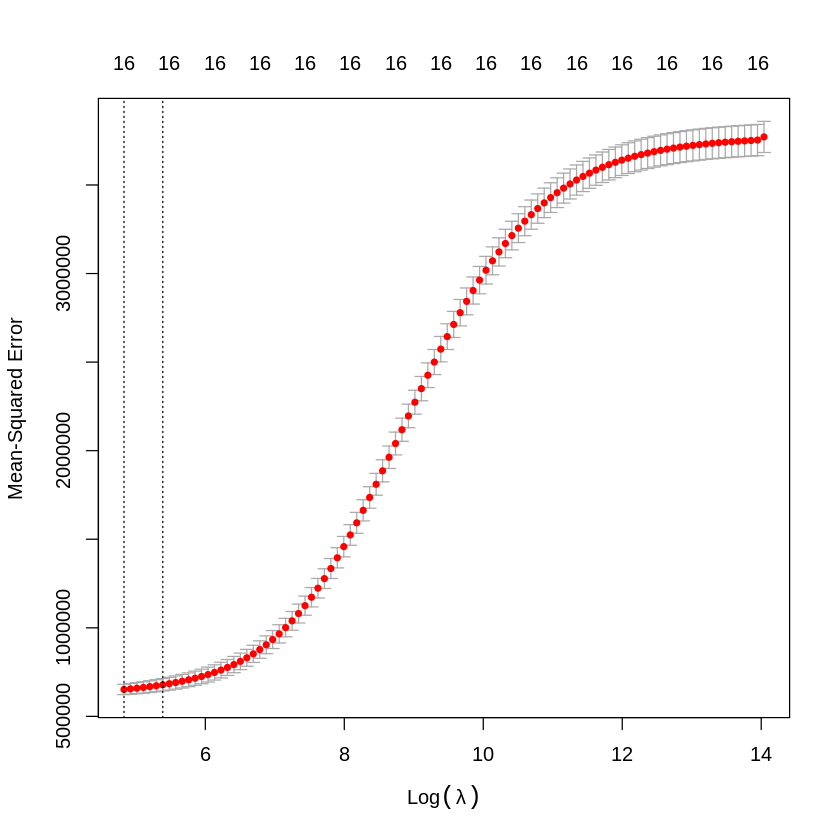

In [ ]:
foundlasso<-cv.glmnet(predic.train, precio.train,alpha=0,nfolds=5)

#grafico lambda vs mse
plot(foundlasso)

In [ ]:
#PRUEBA
#lasso lambda min
predicciones2<-predict.glmnet(fitlasso, predic.test, s=foundlasso$lambda.min)
data.frame(
  RMSE=RMSE(predicciones2,regtecnica.test$conteo),
  R2=R2(predicciones2,regtecnica.test$conteo)
)

#ridge lambda 1.se
predicciones3<-predict.glmnet(fitlasso, predic.test, s=foundlasso$lambda.1se)
data.frame(
  RMSE=RMSE(predicciones3,regtecnica.test$conteo),
  R2=R2(predicciones3,regtecnica.test$conteo)
)


RMSE,s1
<dbl>,<dbl>
945.5096,0.773269


RMSE,s1
<dbl>,<dbl>
1005.488,0.7582409


In [ ]:
#ENTRENAMIENTO
#ridge lambda min
predicciones2<-predict.glmnet(fitlasso, predic.train, s = foundlasso$lambda.min)
data.frame(
  RMSE=RMSE(predicciones2,regtecnica.train$conteo),
  R2=R2(predicciones2,regtecnica.train$conteo)
)

#ridge lambda 1se

predicciones3<-predict.glmnet(fitlasso, predic.train, s=foundlasso$lambda.1se)
data.frame(
  RMSE=RMSE(predicciones3,regtecnica.train$conteo),
  R2=R2(predicciones3,regtecnica.train$conteo)
)

RMSE,s1
<dbl>,<dbl>
889.1494,0.8023887


RMSE,s1
<dbl>,<dbl>
968.1419,0.7828178


Ambos modelos estan sobre ajustados, debido a que en entrenamiento con lambda.1se se tiene un R2 de 0.783 y en prueba de 0.758, asi mismo con lambda minimo se tiene un desempeño de 0.802 en entrenamiento y de 0.773 en prueba, en general ambos modelos se desmpeñan muy similar.Sin embargo se recomendaria usar el que tiene un lambda 1.se ya que es un poquito menor el sobre ajuste

(3) Plantee un modelo de regularización ELASTIC NET usando las mismas variables del modelo1, optimizando el parámetro alfa (llámelo modelo4).

In [ ]:
# aqui hago redes elasticas de 0.1 a 0.9
for (i in 1:10){
  assign(paste("found", i, sep=""), cv.glmnet(predic.train, precio.train, nfolds=5,
                                              alpha=i/10,))}

In [ ]:
print(min(found1$cvm))
print(min(found2$cvm))
print(min(found3$cvm))
print(min(found4$cvm))
print(min(found5$cvm))
print(min(found6$cvm))
print(min(found7$cvm))
print(min(found8$cvm))
print(min(found9$cvm))

[1] 593146.1
[1] 594141.4
[1] 594823.7
[1] 621561.2
[1] 595614.4
[1] 585994.8
[1] 603616.7
[1] 604861.4
[1] 610688.6


In [ ]:
elastic8<-glmnet(predic.train,precio.train,alpha = 0.6)
coef(elastic8,s=found6$lambda.1se)

17 x 1 sparse Matrix of class "dgCMatrix"
                     s1
(Intercept)  3274.95992
temporada.1 -1204.60597
temporada.2     .      
temporada.3  -229.26321
ano.0       -1975.14534
mes.3         203.57142
mes.5         196.35845
mes.8         199.01545
mes.9         793.39195
mes.10        678.07381
festivo.0     631.76596
dia.0        -264.14829
clima.1      1234.46051
clima.2       754.07441
atemp          96.36485
humedad       -14.69499
viento        -43.36425

PRUEBA

In [ ]:
#red elastica
prediccionesred<-predict.glmnet(elastic8, predic.test, s=elastic8$lambda.1se)

In [ ]:
data.frame(
  RMSE=RMSE(prediccionesred,regtecnica.test$conteo),
  R2=R2(prediccionesred,regtecnica.test$conteo)
)

Warning message in cor(obs, pred, use = ifelse(na.rm, "complete.obs", "everything")):
“the standard deviation is zero”


RMSE,R2.s0,R2.s1,R2.s2,R2.s3,R2.s4,R2.s5,R2.s6,R2.s7,R2.s8,⋯,R2.s66,R2.s67,R2.s68,R2.s69,R2.s70,R2.s71,R2.s72,R2.s73,R2.s74,R2.s75
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1040.248,NA,0.3318699,0.480708,0.6047805,0.6651851,0.6907059,0.703727,0.7112759,0.7160636,⋯,0.8040268,0.8039073,0.8037887,0.803675,0.8035779,0.8034824,0.8034022,0.8033223,0.8032452,0.8031836


ENTRENAMIENTO

In [ ]:
#red elastica
prediccionesred<-predict.glmnet(elastic8, predic.train, s=elastic8$lambda.1se)
data.frame(
  RMSE=RMSE(prediccionesred,regtecnica.train$conteo),
  R2=R2(prediccionesred,regtecnica.train$conteo)
)

Warning message in cor(obs, pred, use = ifelse(na.rm, "complete.obs", "everything")):
“the standard deviation is zero”


RMSE,R2.s0,R2.s1,R2.s2,R2.s3,R2.s4,R2.s5,R2.s6,R2.s7,R2.s8,⋯,R2.s66,R2.s67,R2.s68,R2.s69,R2.s70,R2.s71,R2.s72,R2.s73,R2.s74,R2.s75
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
992.164,NA,0.415779,0.5596948,0.6617396,0.7072013,0.7253199,0.7342077,0.7391895,0.7422477,⋯,0.8530062,0.8530332,0.8530571,0.8530775,0.8530933,0.8531073,0.8531181,0.8531279,0.8531364,0.8531426


EL R2 en entrenamiento para mi alpha = 0.73

EL R2 en prueba para mi alpha = 0.6 es de 0.7037

**Entre los 5 modelos desarrollados, seleccione el mejor modelo teniendo en cuenta las métricas generadas en entrenamiento y prueba.**

Entre los 5 modelos desarrollados, el mejor modelo Viendo los resultados, el mejor modelo es el 0 - base.  El modelo base tiene R2 = 0.84 en entrenamiento y R2=0.80 en prueba, superando a todos los demás modelos.

# PUNTO 2

# **REGRESIÓN LOGÍSTICA**

In [ ]:
if (!require('caret')) install.packages('caret')

In [4]:

if (!require('ROCR')) install.packages('ROCR')

Loading required package: ROCR

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘ROCR’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’, ‘gplots’




In [5]:
library(caret)
library(ROCR)
library(ggplot2)
library(readxl)

In [6]:
cartera<- read.csv("/content/Bonificacion.csv")
str(cartera)

'data.frame':	838 obs. of  12 variables:
 $ Personas_Hogar                    : num  7 2 12 6 1 8 5 9 7 10 ...
 $ Subsidio_agua                     : num  16471 22474 16312 16090 46700 ...
 $ Tipo_jardin                       : num  2 2 0 0 2 2 1 1 0 1 ...
 $ Tiempo_en_ducha                   : num  11 4 1 1 3 15 2 2 2 12 ...
 $ Cantidad_de_veces_que_se_lava_loza: num  8 2 2 1 1 7 2 3 1 10 ...
 $ Drenaje_diario                    : num  12 1 1 1 1 8 3 14 3 15 ...
 $ Lavadora                          : num  6 7 7 6 2 5 1 3 3 6 ...
 $ Cantidad_de_Litros_tomados        : num  4 2 2 4 1 3 5 3 5 2 ...
 $ Metros_inmueble                   : num  28 98 133 154 170 158 197 126 145 184 ...
 $ Bono                              : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Mascotas                          : num  10 7 2 6 5 7 5 1 4 2 ...
 $ Fiestas_mes                       : num  5 4 2 7 7 2 5 5 9 5 ...


La variable a predecir debe ser un factor y las demás numéricas

# Preparacion de Datos

Se debe convertir la variable a predecir a Factor

In [7]:
cartera$Bono<-as.factor(cartera$Bono)
str(cartera)

'data.frame':	838 obs. of  12 variables:
 $ Personas_Hogar                    : num  7 2 12 6 1 8 5 9 7 10 ...
 $ Subsidio_agua                     : num  16471 22474 16312 16090 46700 ...
 $ Tipo_jardin                       : num  2 2 0 0 2 2 1 1 0 1 ...
 $ Tiempo_en_ducha                   : num  11 4 1 1 3 15 2 2 2 12 ...
 $ Cantidad_de_veces_que_se_lava_loza: num  8 2 2 1 1 7 2 3 1 10 ...
 $ Drenaje_diario                    : num  12 1 1 1 1 8 3 14 3 15 ...
 $ Lavadora                          : num  6 7 7 6 2 5 1 3 3 6 ...
 $ Cantidad_de_Litros_tomados        : num  4 2 2 4 1 3 5 3 5 2 ...
 $ Metros_inmueble                   : num  28 98 133 154 170 158 197 126 145 184 ...
 $ Bono                              : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ Mascotas                          : num  10 7 2 6 5 7 5 1 4 2 ...
 $ Fiestas_mes                       : num  5 4 2 7 7 2 5 5 9 5 ...


**La probabilidad de Renuncia es de 0.5**

In [8]:
balance<-table(cartera$Bono)
prop.table(balance)


        0         1 
0.4618138 0.5381862 

In [9]:
set.seed(1) #aquí se define el tamaño de la muestra, en este caso entrenamiento tendrá el 75% de los casos
sample <- sample.int(nrow(cartera), floor(.75*nrow(cartera)))
cartera.train <- cartera[sample, ]
cartera.test <- cartera[-sample, ]

In [10]:
str(cartera.train)

'data.frame':	628 obs. of  12 variables:
 $ Personas_Hogar                    : num  16.9 18 1 5 2 ...
 $ Subsidio_agua                     : num  31520 32876 40586 38874 32399 ...
 $ Tipo_jardin                       : num  1 2 0 1 2 0 1 2 1 2 ...
 $ Tiempo_en_ducha                   : num  10 12 7 4 10 ...
 $ Cantidad_de_veces_que_se_lava_loza: num  7.95 7 9 1 10 ...
 $ Drenaje_diario                    : num  12.5 16 10 1 12 ...
 $ Lavadora                          : num  6.51 1 2 3 1 ...
 $ Cantidad_de_Litros_tomados        : num  5 1 5 2 2 1 3 5 5 2 ...
 $ Metros_inmueble                   : num  159 97 103 84 41 ...
 $ Bono                              : Factor w/ 2 levels "0","1": 1 1 2 1 1 2 2 2 2 1 ...
 $ Mascotas                          : num  3.46 4 9 10 5 ...
 $ Fiestas_mes                       : num  10 5 1 1 3 2 7 3 6 1 ...


# MODELO

**(5) Plantee un modelo para predecir si un hogar debe recibir bonificación. Utilice un cutoff de 0.5. Calcule las métricas de desempeño (accuracy, F1-score para la clase positiva) tanto en entrenamiento como en prueba.**

In [11]:
##Modelo
set.seed(1)
modelo.logit<-glm(Bono~.,family=binomial,cartera.train) #Aqui solo se cambia la variable a predecir, de resto es igual
#trace=0 impide ver todos los detalles de la optimización stepwise
steplogit<-step(modelo.logit, direction="both")
summary(steplogit)

Start:  AIC=646.64
Bono ~ Personas_Hogar + Subsidio_agua + Tipo_jardin + Tiempo_en_ducha + 
    Cantidad_de_veces_que_se_lava_loza + Drenaje_diario + Lavadora + 
    Cantidad_de_Litros_tomados + Metros_inmueble + Mascotas + 
    Fiestas_mes

                                     Df Deviance    AIC
- Personas_Hogar                      1   622.96 644.96
- Mascotas                            1   623.05 645.05
<none>                                    622.64 646.64
- Drenaje_diario                      1   624.97 646.97
- Lavadora                            1   626.67 648.67
- Fiestas_mes                         1   628.84 650.84
- Cantidad_de_veces_que_se_lava_loza  1   629.64 651.64
- Cantidad_de_Litros_tomados          1   632.87 654.87
- Metros_inmueble                     1   637.34 659.34
- Tipo_jardin                         1   638.88 660.88
- Tiempo_en_ducha                     1   649.64 671.64
- Subsidio_agua                       1   662.62 684.62

Step:  AIC=644.96
Bono ~ Subs


Call:
glm(formula = Bono ~ Subsidio_agua + Tipo_jardin + Tiempo_en_ducha + 
    Cantidad_de_veces_que_se_lava_loza + Drenaje_diario + Lavadora + 
    Cantidad_de_Litros_tomados + Metros_inmueble + Fiestas_mes, 
    family = binomial, data = cartera.train)

Coefficients:
                                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)                         1.818e+00  6.022e-01   3.020  0.00253 ** 
Subsidio_agua                      -6.830e-05  1.136e-05  -6.013 1.82e-09 ***
Tipo_jardin                         5.318e-01  1.316e-01   4.041 5.33e-05 ***
Tiempo_en_ducha                    -1.713e-01  3.400e-02  -5.040 4.66e-07 ***
Cantidad_de_veces_que_se_lava_loza -1.418e-01  5.457e-02  -2.599  0.00935 ** 
Drenaje_diario                     -4.012e-02  2.601e-02  -1.543  0.12292    
Lavadora                            1.140e-01  5.437e-02   2.097  0.03595 *  
Cantidad_de_Litros_tomados          2.425e-01  7.590e-02   3.195  0.00140 ** 
Metros_inmueble           

In [12]:
#crea el pronostico base de entrenamiento
prontrain<-ifelse(steplogit$fitted.values > 0.5,1,0)
#tabla de confusión y estadisticas, base de entrenamiento
conftrain<-confusionMatrix(as.factor(prontrain),cartera.train$Bono, positive = "1")
conftrain

train_f1 <- conftrain$byClass["F1"]
cat("Training F1-score:", train_f1, "\n")

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 212  75
         1  82 259
                                          
               Accuracy : 0.75            
                 95% CI : (0.7142, 0.7834)
    No Information Rate : 0.5318          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.4972          
                                          
 Mcnemar's Test P-Value : 0.632           
                                          
            Sensitivity : 0.7754          
            Specificity : 0.7211          
         Pos Pred Value : 0.7595          
         Neg Pred Value : 0.7387          
             Prevalence : 0.5318          
         Detection Rate : 0.4124          
   Detection Prevalence : 0.5430          
      Balanced Accuracy : 0.7483          
                                          
       'Positive' Class : 1               
                              

Training F1-score: 0.7674074 


In [13]:
#crea el pronóstico en validación
probtest<-predict(steplogit,newdata = cartera.test,type='response')
prontest<-ifelse(probtest > 0.5,1,0)
conftest<-confusionMatrix(as.factor(prontest),cartera.test$Bono, positive = "1")
conftest

test_f1 <- conftest$byClass["F1"]
cat("Test F1-score:", test_f1, "\n")

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 68 34
         1 25 83
                                          
               Accuracy : 0.719           
                 95% CI : (0.6531, 0.7787)
    No Information Rate : 0.5571          
    P-Value [Acc > NIR] : 9.996e-07       
                                          
                  Kappa : 0.4363          
                                          
 Mcnemar's Test P-Value : 0.2976          
                                          
            Sensitivity : 0.7094          
            Specificity : 0.7312          
         Pos Pred Value : 0.7685          
         Neg Pred Value : 0.6667          
             Prevalence : 0.5571          
         Detection Rate : 0.3952          
   Detection Prevalence : 0.5143          
      Balanced Accuracy : 0.7203          
                                          
       'Positive' Class : 1               
                                    

Test F1-score: 0.7377778 


**(3) De las variables presentes en el modelo final, si tuviera que eliminar una variable de las que quedaron en el modelo final, ¿cuál eliminaría y porqué?**

Eliminaría la variable **Drenaje_diario** pues es la que tiene mayor p-value, dando a entender que es la menos significativa.                

Estos odd_change se interpretan en terminos de si son mayores a 1 o menor a 1, si el odd change es mayor a 1, significa que ante un aumento de uno en esa variable, permaneciendo las demas constantes, aumenta el chance de renunciar, si es menor a 1, el caso contrario

**(8) Tomando como probabilidad base la probabilidad de obtener una bonificación, determine la probabilidad final que se obtiene al aumentar en 3 el número promedio de veces que se lava la loza diariamente, suponiendo que las demás variables no tienen ningún cambio. Realice este cálculo en una hoja de Excel, luego en el notebook valide el número obtenido (muestre que en los cálculos de R aparece dicho valor).**

In [14]:
coeficientes<-steplogit$coefficients
odd_change<-exp(coeficientes)
odd_change_ver<-as.data.frame(odd_change)
odd_change_ver

,odd_change
,<dbl>
(Intercept),6.1624848
Subsidio_agua,0.9999317
Tipo_jardin,1.7019542
Tiempo_en_ducha,0.8425397
Cantidad_de_veces_que_se_lava_loza,0.8677672
Drenaje_diario,0.9606723
Lavadora,1.1207886
Cantidad_de_Litros_tomados,1.2744867
Metros_inmueble,1.0084475


In [15]:
#Odd ratios
balance<-table(cartera$Bono)
prop.table(balance)
oddbase<-prop.table(balance)[2]/prop.table(balance)[1]
oddbase


        0         1 
0.4618138 0.5381862 

1 
1.165375

In [ ]:
oddfin<-oddbase*odd_change
prob1step<-as.data.frame(oddfin/(1+oddfin))
View(prob1step)

,oddfin/(1 + oddfin)
,<dbl>
(Intercept),0.8777746
Subsidio_agua,0.5381692
Tipo_jardin,0.6648136
Tiempo_en_ducha,0.4954272
Cantidad_de_veces_que_se_lava_loza,0.5028027
Drenaje_diario,0.5282002
Lavadora,0.5663747
Cantidad_de_Litros_tomados,0.5976267
Metros_inmueble,0.5402762


In [ ]:
#crear matriz vacia
oddprueba<-matrix(,4,29)
probprueba<-matrix(,4,29)
oddprueba

NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [ ]:
#borrar el intercepto
odd_change2<-odd_change[2:5]
odd_change2

Subsidio_agua                        Tipo_jardin 
                         0.9999317                          1.7019542 
                   Tiempo_en_ducha Cantidad_de_veces_que_se_lava_loza 
                         0.8425397                          0.8677672

In [ ]:
#guardar odd base y probabilidad base
oddprueba[,11]<-oddbase
probprueba[,11]<-oddprueba[,11]/(1+oddprueba[,11])
oddprueba[,8:14]

NA,NA,NA,1.165375,NA,NA,NA
NA,NA,NA,1.165375,NA,NA,NA
NA,NA,NA,1.165375,NA,NA,NA
NA,NA,NA,1.165375,NA,NA,NA


In [ ]:
#calcular odds y probabilidades 17 pasos adelante
for (i in 12:29){
  oddprueba[,i]<-oddprueba[,i-1]*odd_change2
  probprueba[,i]<-oddprueba[,i]/(1+oddprueba[,i])
}

In [ ]:
#y 10 atrás
for (i in 10:1){
  oddprueba[,i]<-oddprueba[,i+1]/odd_change2
  probprueba[,i]<-oddprueba[,i]/(1+oddprueba[,i])
}

In [ ]:
oddprueba[,8:14]
probprueba[,8:14]

1.1656135,1.1655339,1.1654543,1.165375,1.1652951,1.1652155,1.1651359
0.2363861,0.4023183,0.6847274,1.165375,1.9834144,3.3756805,5.7452536
1.9484731,1.6416660,1.3831688,1.165375,0.9818745,0.8272682,0.6970063
1.7834292,1.5476014,1.3429577,1.165375,1.0112739,0.8775503,0.7615094


0.5382371,0.5382201,0.5382031,0.5381862,0.5381692,0.5381522,0.5381352
0.1911912,0.2868952,0.4064322,0.5381862,0.6648136,0.7714641,0.8517476
0.6608414,0.6214510,0.5803906,0.5381862,0.4954272,0.4527350,0.4107270
0.6407309,0.6074739,0.5731891,0.5381862,0.5028027,0.4673911,0.4323050


**RTA : En la matriz se observa que al aumentar en 3 el número promedio de veces que se lava la loza diariamente, suponiendo que las demás variables no tienen ningún cambio, la probabilidad de Bono (dar una bonificacion) es de 0.4323050**

- Prob Aumento 1 = 0.5028027
- Prob Aumento 2 = 0.4673911
- Prob Aumento 3 = 0.4323050

In [ ]:
steplogit$fitted.values

836        679        129        509        471        299        270 
0.72173037 0.18629530 0.19126280 0.60902267 0.14735734 0.49494138 0.33758822 
       187        307        597        277        494        330        775 
0.92609143 0.70495456 0.38321523 0.87663174 0.10535597 0.13832213 0.55866299 
       591        725         37        105        729        485        677 
0.27394477 0.49403130 0.91023457 0.55195839 0.43403204 0.35521730 0.50626083 
       802        382        601        801        326        826        554 
0.19502589 0.55583237 0.16218254 0.57299237 0.46134366 0.26574693 0.48691856 
       422        111        404        532        506        556        343 
0.76392732 0.73858339 0.96162738 0.74366731 0.11063116 0.13342602 0.38267224 
       582        121         40        684        537        375        248 
0.28637421 0.96063635 0.22318394 0.63474842 0.74366731 0.96271675 0.80178553 
       198        378         39        435        390        280        672 
0.88104718 0.48482335 0.54820696 0.63495128 0.69324823 0.82967215 0.45396690 
       526        642         45        402         22        718        742 
0.55564628 0.05447913 0.56036439 0.74366731 0.95276617 0.43669315 0.36240106 
       193        371        499        104        813        767        492 
0.79320223 0.56431478 0.08247342 0.86386216 0.58598599 0.44405256 0.17653773 
       616        615        465        525        820        176        345 
0.13614036 0.32363461 0.13902097 0.36059335 0.27240720 0.50626083 0.86519530 
       110         84         29        141        252        733        620 
0.94430048 0.94430048 0.38651931 0.61354140 0.56230940 0.11014510 0.38294941 
       304        545        557        661        287        614        145 
0.52955347 0.35764660 0.15246827 0.16888040 0.97410930 0.20854462 0.33435371 
       329        487        630        498        619        576        490 
0.96868479 0.18187079 0.52255445 0.18674809 0.10834158 0.10755128 0.45093777 
       736        103        316         51        763        290        650 
0.56087077 0.92620117 0.13996222 0.05908395 0.11899947 0.64232295 0.27854313 
       838        282        143        442        285        682         48 
0.53157235 0.87295440 0.98235717 0.50786698 0.91015495 0.23823212 0.84910498 
       501        716        511        295        536        693        214 
0.60902267 0.41790504 0.16375072 0.09674074 0.74366731 0.66986946 0.65261927 
       339        346        675         43          1        766        590 
0.63098226 0.48482335 0.27197403 0.08773068 0.63495128 0.24649981 0.33158954 
       628        233        293        573        369        451         86 
0.52255445 0.93818711 0.51890826 0.46554924 0.93431578 0.60902267 0.91844745 
       483        327        622        355         49        361        745 
0.72507343 0.86793094 0.38294941 0.98676154 0.94113038 0.16608591 0.33664111 
       242        440        247        219        135        809        807 
0.80734184 0.93818711 0.04131851 0.77119247 0.87188049 0.07116859 0.31387323 
       377        408        744        565        467        356        130 
0.10906434 0.96188194 0.09774970 0.44563915 0.66893135 0.91015495 0.75168162 
        65        359        821        124         77        218        610 
0.90785019 0.33435371 0.45470494 0.51287010 0.99356557 0.55583237 0.13614036 
       194         19        273        418        543        419        403 
0.76369671 0.84689263 0.89575953 0.78394226 0.43629916 0.78433347 0.84188448 
       587         16        814        604        634        664        138 
0.19712933 0.14627008 0.23572779 0.13614036 0.43381641 0.09950629 0.30083295 
       500        229        423        421        140        126        789 
0.08247342 0.98096722 0.87295440 0.81132889 0.75168162 0.69702211 0.20951201 
       508        719        676        271        692        577        512 
0.41260862 0.26471619 0.16482

In [ ]:
##nuevo sobre precision
cartllev<-cbind(cartera.test,probtest)

In [ ]:
#crear objeto de predicciones
pr<-prediction(probtest,cartera.test$Bono)
#creacion del objeto de la curva
curvaROC<-performance(pr,measure="tpr",x.measure="fpr")

[1] 0.813666

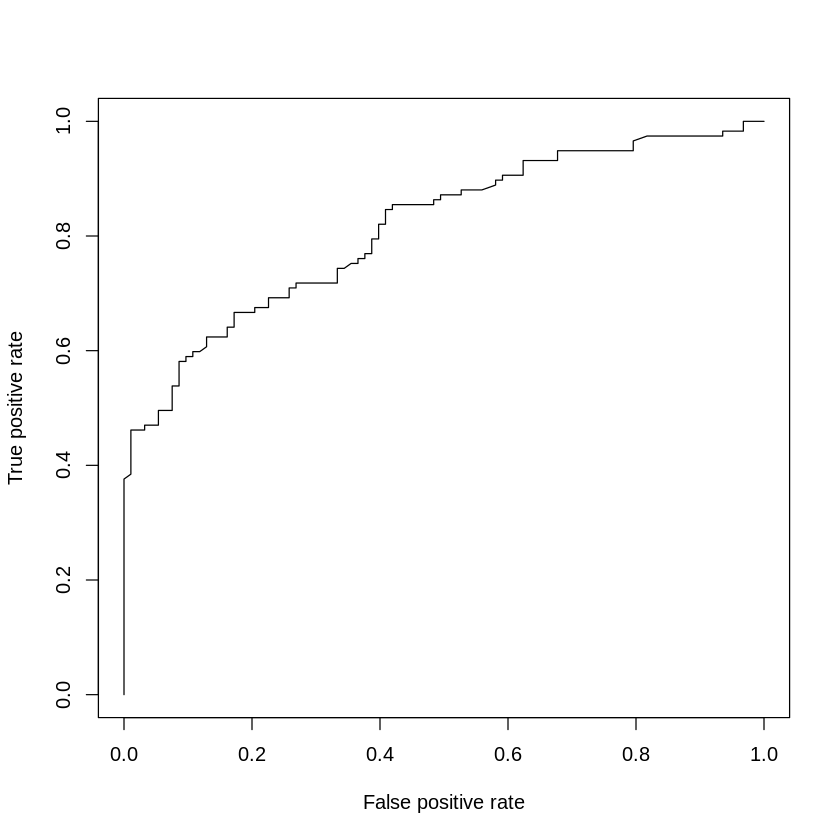

In [ ]:
#grafico de la curva
plot(curvaROC)
#calcular el AUC
auc<-performance(pr,measure = "auc")
auc <- auc@y.values[[1]]
#ver el AUC
auc

# EVALUACION FINANCIERA

In [ ]:
#guardar las exhaustividades y puntos de corte
tablafinan<-performance(pr,measure="rec")
cutoffs<-unlist(tablafinan@x.values)
recalls<-unlist(tablafinan@y.values)

In [ ]:
#guardar las precisiones
tablafina2<-performance(pr,measure="prec")
precisions<-unlist(tablafina2@y.values)

In [ ]:
#guardar f scores
tablafina3<-performance(pr,measure="f")
fscores<-unlist(tablafina3@y.values)

In [ ]:
#crear la tabla conjunta
tablacruce<-as.data.frame(cbind(cutoffs,precisions,recalls,fscores))
tablacruce

,cutoffs,precisions,recalls,fscores
,<dbl>,<dbl>,<dbl>,<dbl>
,Inf,NaN,0.000000000,NaN
221,0.9823572,1,0.008547009,0.01694915
257,0.9803542,1,0.017094017,0.03361345
227,0.9777840,1,0.025641026,0.05000000
348,0.9743676,1,0.034188034,0.06611570
152,0.9671897,1,0.042735043,0.08196721
186,0.9661423,1,0.051282051,0.09756098
347,0.9631547,1,0.059829060,0.11290323
90,0.9623328,1,0.068376068,0.12800000


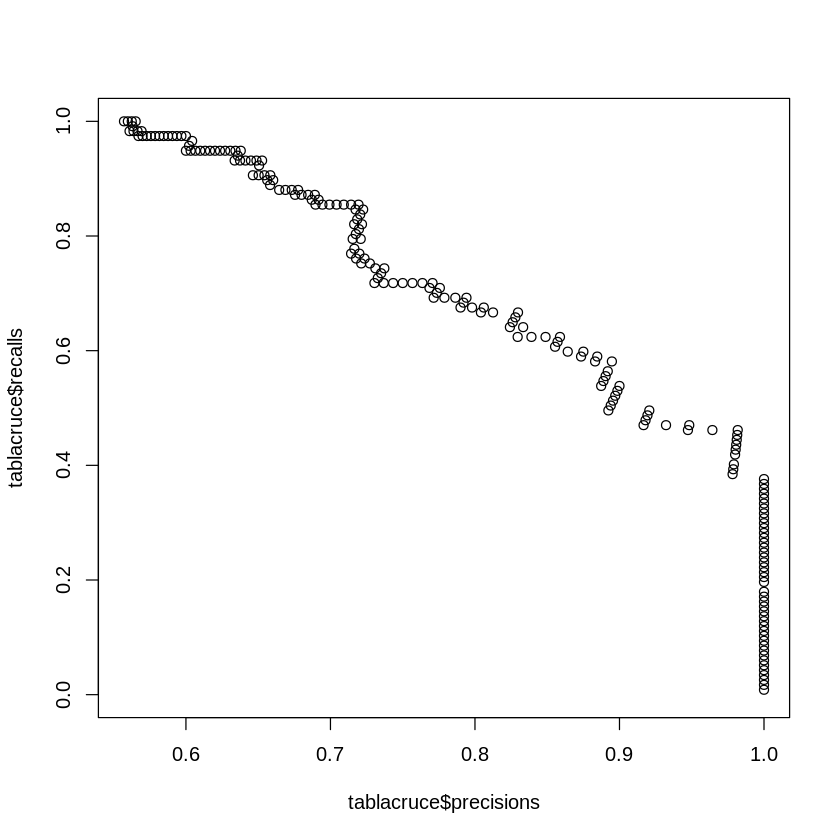

In [ ]:

#ver precisiones versus exhaustividad
plot(tablacruce$precisions,tablacruce$recalls)

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


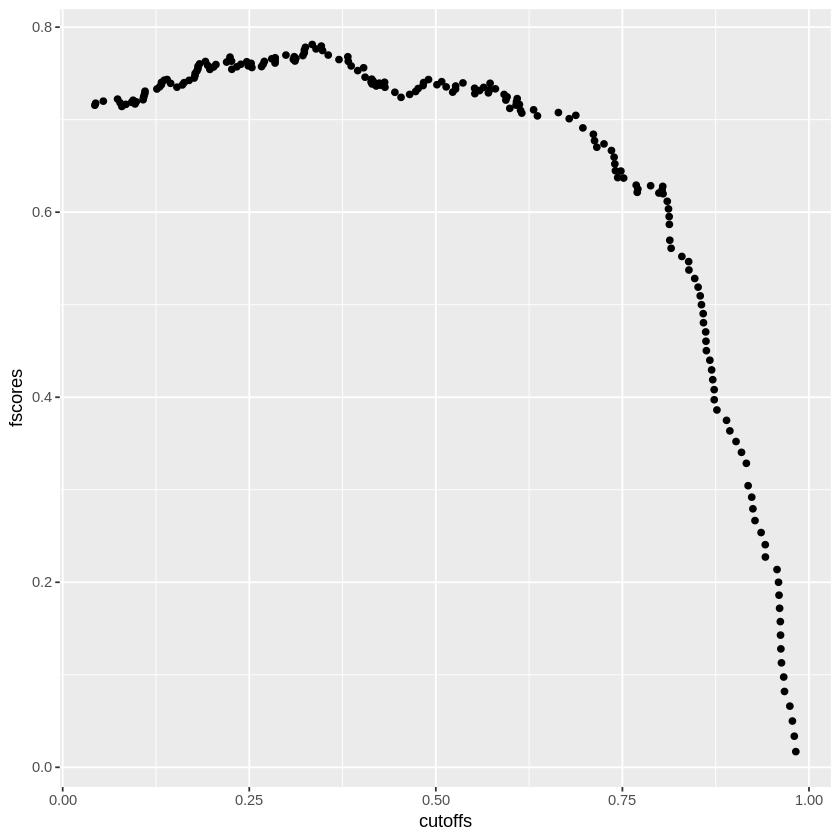

In [ ]:
#ver el cutoff que maximiza f score
ggplot(tablacruce, aes(cutoffs,fscores))+geom_point()

**(5) Se selecciona un grupo de 2000 hogares para evaluar la implementación de la estrategia. Se ha estimado que por cada hogar categorizado correctamente se estima un ahorro promedio de 800, mientras que por cada hogar mal categorizado se estima un costo de 350. Basado en el cutoff de 0.5, ¿cuál sería la ganancia esperada en términos monetarios para este modelo?**

Basandonos en un corte de 0.5014789 se espera una ganancia de 131.5566

In [ ]:
#calcular las ganancias
tablacruce$ganancia<-2000*prop.table(balance)[2]*recalls*(800-(350/precisions))

In [ ]:
prop.table(balance)[2]

1 
0.5381862

In [ ]:
tablaver<-subset(tablacruce, tablacruce$cutoffs>0.2 & tablacruce$cutoffs<0.54)
View(tablaver)

,cutoffs,precisions,recalls,fscores,ganancia
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
76,0.5363150,0.7941176,0.6923077,0.7397260,133.8566
717,0.5265744,0.7864078,0.6923077,0.7363636,132.2466
639,0.5263872,0.7788462,0.6923077,0.7330317,130.6366
800,0.5225544,0.7714286,0.6923077,0.7297297,129.0267
210,0.5138280,0.7735849,0.7008547,0.7354260,131.0966
80,0.5078670,0.7757009,0.7094017,0.7410714,133.1666
771,0.5014789,0.7685185,0.7094017,0.7377778,131.5566
275,0.4901658,0.7706422,0.7179487,0.7433628,133.6266
635,0.4835840,0.7636364,0.7179487,0.7400881,132.0166


**(4) Si el cutoff se disminuye a 0.3, ¿cómo afectaría el precision y el recall? ¿Cómo afectaría la ganancia obtenida en el ítem anterior? Justifique sus respuestas. Valídelas con los resultados obtenidos en el notebook.**



Si el punto de corte disminuye a 0.3, el recall aumenta ya que hay mas verdaderos positivos y menos falsos negativos, sin embargo aumentan los falsos positivos, por lo que el precision disminuye. Con un cutoff aproximado de 0.2991421, la ganancia aumenta de 131.5566 a 137.0765, la presicion disminuye a 0.6891892 y el recall aumenta de 0.7094017 a  0.8717949

In [ ]:
#crea el pronóstico en validación
probtest<-predict(steplogit,newdata = cartera.test,type='response')
prontest<-ifelse(probtest > 0.5,1,0)

conftest<-confusionMatrix(as.factor(prontest),cartera.test$Renuncia, positive = "1")
conftest

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 112   8
         1   7 123
                                        
               Accuracy : 0.94          
                 95% CI : (0.903, 0.966)
    No Information Rate : 0.524         
    P-Value [Acc > NIR] : <2e-16        
                                        
                  Kappa : 0.8798        
                                        
 Mcnemar's Test P-Value : 1             
                                        
            Sensitivity : 0.9389        
            Specificity : 0.9412        
         Pos Pred Value : 0.9462        
         Neg Pred Value : 0.9333        
             Prevalence : 0.5240        
         Detection Rate : 0.4920        
   Detection Prevalence : 0.5200        
      Balanced Accuracy : 0.9401        
                                        
       'Positive' Class : 1             
                                        